In [37]:
from google.colab import files
import pandas as pd
import io
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
df_lower=pd.read_csv("/content/lower_playoff_dataset.csv")

In [39]:
df_upper=pd.read_csv("/content/upper_playoff_dataset.csv")

In [40]:
df_lower.head()

,game_date,time,opponent_team,zone_5_distance_defenders,zone_5_time_defenders,zone_6_distance_defenders,zone_6_time_defenders,zone_5_distance_midfielders,zone_5_time_midfielders,zone_6_distance_midfielders,...,accelerations_defenders,decelerations_defenders,accelerations_midfielders,decelerations_midfielders,accelerations_attackers,decelerations_attackers,TotalxG,opponent_team_xG,xG_diff,xPts
0,03/09/2023,17:00:58,Hapoel Jerusalem,2194.8595,363.7,775.1448,101.8,2368.6880,397.4,508.2946,...,542.0,209.0,579.0,259.0,304.0,130.0,1.67,0.60,1.07,2.205
1,17/09/2023,17:01:00,Maccabi Petach Tikva,2171.3559,359.2,673.0986,89.4,2400.1303,400.5,516.6199,...,486.0,188.0,613.0,239.0,192.0,78.0,1.72,1.88,-0.16,1.413
2,01/10/2023,17:16:33,Maccabi Netanya,1826.9987,303.0,542.2032,71.5,1959.3291,328.4,337.9914,...,443.0,200.0,557.0,236.0,377.0,152.0,1.62,1.70,-0.08,1.266
3,25/11/2023,18:00:47,Hapoel Petach Tikva,1657.3516,275.4,467.7862,62.4,2240.9246,374.6,410.6001,...,328.0,154.0,519.0,221.0,238.0,94.0,2.03,1.02,1.01,2.159
4,10/12/2023,18:30:40,Beitar Jerusalem,1956.7666,325.1,719.2517,94.8,2546.3379,427.1,489.2565,...,447.0,173.0,565.0,234.0,562.0,232.0,3.13,0.16,2.97,2.920


In [41]:
df_upper.head()

,game_date,time,opponent_team,zone_5_distance_defenders,zone_5_time_defenders,zone_6_distance_defenders,zone_6_time_defenders,zone_5_distance_midfielders,zone_5_time_midfielders,zone_6_distance_midfielders,...,accelerations_defenders,decelerations_defenders,accelerations_midfielders,decelerations_midfielders,accelerations_attackers,decelerations_attackers,TotalxG,opponent_team_xG,xG_diff,xPts
0,27/09/2023,17:02:36,Bnei Sakhnin,2028.3958,338.0,525.9290,70.2,2344.5552,390.0,565.8949,...,497,239,598,225,295,130,2.00,0.32,1.68,2.599
1,03/12/2023,18:31:25,Hapoel Be'er Sheva,1343.5764,224.3,374.1456,49.7,2459.0131,411.2,487.4959,...,379,205,538,225,429,143,1.54,0.44,1.10,2.253
2,17/12/2023,18:32:00,Hapoel Haifa,2029.2769,338.2,480.9146,64.0,1909.0157,319.2,322.3075,...,481,249,575,209,352,107,2.47,0.86,1.61,2.409
3,27/12/2023,17:59:50,Maccabi Bney Reine,2625.6779,435.7,759.5412,100.4,2176.8431,366.0,243.8933,...,386,205,591,262,291,127,1.09,0.13,0.96,2.213
4,10/01/2024,18:31:05,Maccabi Tel Aviv,2166.2781,359.4,824.5309,107.7,3124.3633,520.1,675.4736,...,490,228,668,342,285,89,1.59,1.68,-0.09,1.285


In [42]:
df_upper = df_upper.drop(['game_date','time','opponent_team','xPts','opponent_team_xG','xG_diff'], axis=1)

In [43]:
df_lower = df_lower.drop(['game_date','time','opponent_team','xPts','opponent_team_xG','xG_diff'], axis=1)

In [44]:
# df = df.drop(['opponent_team_xG','xG_diff', 'xPts'], axis=1)

In [45]:
y_lower = df_lower['TotalxG']
X_lower = df_lower.drop(['TotalxG'], axis=1)

In [46]:
y_upper = df_upper['TotalxG']
X_upper = df_upper.drop(['TotalxG'], axis=1)

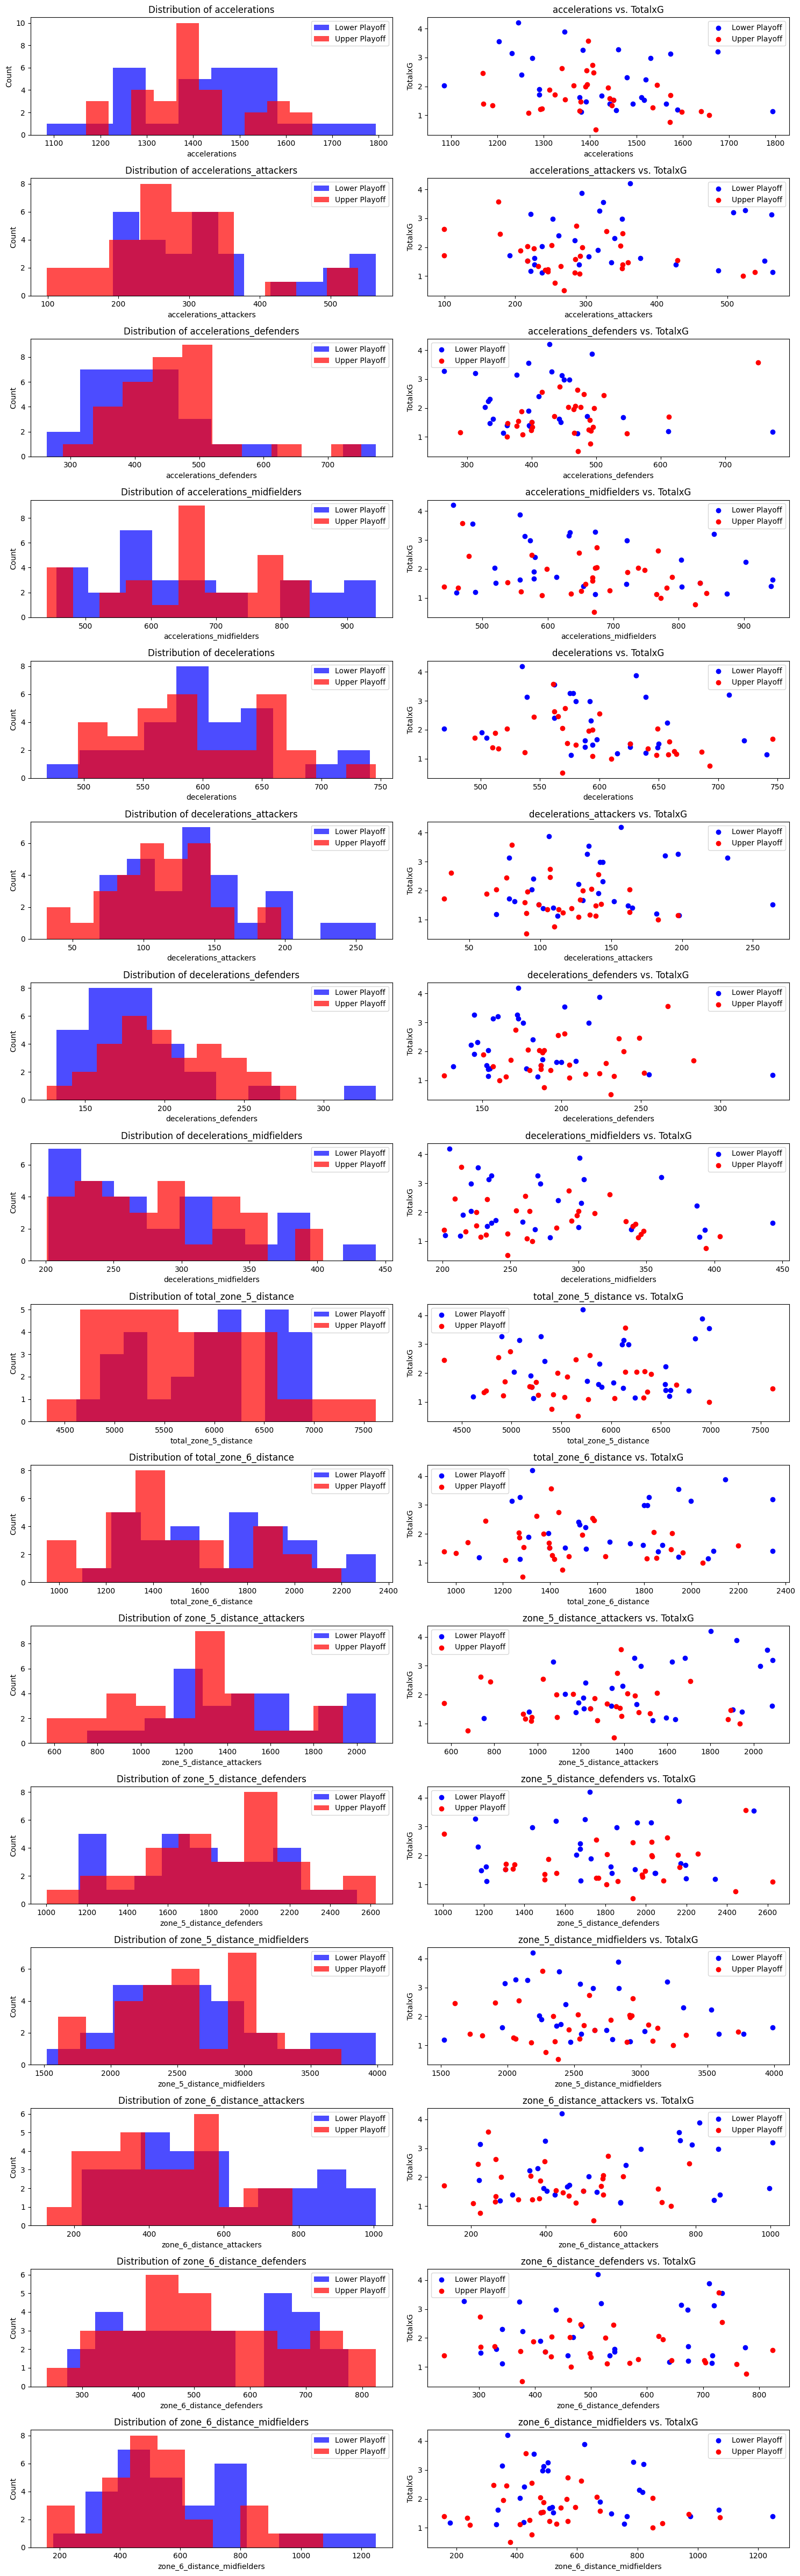

In [47]:
features_to_show = [feature for feature in X_lower.columns if 'time' not in feature]
features_to_show.sort()
num_features = len(features_to_show)
fig, axes = plt.subplots(num_features, 2, figsize=(15, num_features * 3))

for i, feature in enumerate(features_to_show):
  # Histogram for lower playoff data (blue)
  axes[i, 0].hist(X_lower[feature], color='blue', alpha=0.7, label='Lower Playoff')
  # Histogram for upper playoff data (red)
  axes[i, 0].hist(X_upper[feature], color='red', alpha=0.7, label='Upper Playoff')
  axes[i, 0].set_ylabel('Count')
  axes[i, 0].set_xlabel(feature)
  axes[i, 0].set_title(f'Distribution of {feature}')
  axes[i, 0].legend()

  # Scatter plot for lower playoff data (blue)
  axes[i, 1].scatter(X_lower[feature], y_lower, color='blue', label='Lower Playoff')
  # Scatter plot for upper playoff data (red)
  axes[i, 1].scatter(X_upper[feature], y_upper, color='red', label='Upper Playoff')
  axes[i, 1].set_xlabel(feature)
  axes[i, 1].set_ylabel('TotalxG')
  axes[i, 1].set_title(f'{feature} vs. TotalxG')
  axes[i, 1].legend()

plt.tight_layout()
plt.show()